In [1]:
#in this project we will get weather information from NOAA
#we will conver the file to readable format and play around
import numpy as np
import matplotlib.pyplot as pp
import seaborn

In [4]:
%matplotlib inline

In [5]:
#importing ftp data over the internet
import urllib.request
urllib.request.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt','stations.txt')

('stations.txt', <email.message.Message at 0x21f110ea208>)

In [6]:
open('stations.txt','r').readlines()[:5]

['ACW00011604  17.1167  -61.7833   10.1    ST JOHNS COOLIDGE FLD                       \n',
 'ACW00011647  17.1333  -61.7833   19.2    ST JOHNS                                    \n',
 'AE000041196  25.3330   55.5170   34.0    SHARJAH INTER. AIRP            GSN     41196\n',
 'AEM00041194  25.2550   55.3640   10.4    DUBAI INTL                             41194\n',
 'AEM00041217  24.4330   54.6510   26.8    ABU DHABI INTL                         41217\n']

In [9]:
#making an empty dictionary
GSN_stations = {}

#get lines with 'GSN' string in them 
#SPLIT those lines 
#JOIN lines with CODE as the key and fields with array loc 4 onwards 
for line in open('stations.txt','r'):
    if 'GSN' in line:
        field = line.split()
        
        GSN_stations[field[0]] = ' '.join(field[4:])

In [10]:
#find stations
def findstation(s):
    station = {code: name for code,name in stations.items() if s in name}
    print(station)

In [11]:
findstation('PARIS')

{'ASN00017031': 'MARREE COMPARISON GSN 94480'}


In [15]:
#we will use the following stations for further procesing
my_stations = ['USW00022536','USW00023188','USW00014922','RSM00030710']

In [16]:
#this is how the contents look like inside the file
open('USW00022536.dly','r').readlines()[:5]

['USW00022536195002TMAX  256  0  256  0  256  0  267  0  217  0  228  0  256  0  272  0  256  0  256  0  256  0  244  0  256  0  256  0  244  0  244  0  250  0  256  0  239  0  250  0  256  0  256  0  267  0  261  0  267  0  267  0  261  0  261  0-9999   -9999   -9999   \n',
 'USW00022536195002TMIN  178  0  156  0  161  0  167  0  167  0  167  0  189  0  211  0  206  0  217  0  217  0  211  0  200  0  200  0  206  0  183  0  206  0  206  0  206  0  194  0  206  0  200  0  206  0  200  0  211  0  183  0  172  0  200  0-9999   -9999   -9999   \n',
 'USW00022536195002PRCP    0  0    0  0    0  0    0  0  737  0  406  0   36  0   38  0    0T 0    0T 0    0  0    0T 0   18  0    5  0   10  0   18  0   15  0    5  0    0T 0    0T 0   23  0   10  0    3  0   48  0    0T 0    0T 0    0T 0    5  0-9999   -9999   -9999   \n',
 'USW00022536195002SNOW    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0

In [17]:
#to make the file end-reader friendly
def convert(file_name):
    return np.genfromtxt(file_name,
                         delimiter = file_delimiter,
                         usecols = file_cols,
                         dtype = file_dtype,
                         names = file_names)

In [18]:
#define length, columns_used, datatypes of all columns and names of each columns
file_delimiter = [11,4,2,4] + [5,1,1,1] * 31
file_cols = [1,2,3] + [4*i for i in range(1,32)]
file_dtype = [np.int32,np.int32,(np.str_,4)] + [np.int32] * 31
file_names = ['year','month','obs'] + [str(day) for day in range(1,31+1)]

In [20]:
#taking Lihue as an example
lihue = convert('USW00022536.dly')

In [21]:
lihue

array([(1950, 2, 'TMAX',   256,   256,   256,   267,   217,   228,   256,   272,   256,   256,   256,   244,   256,   256,   244,   244,   250,   256,   239,   250,   256,   256,   267,   261,   267,   267,   261,   261, -9999, -9999, -9999),
       (1950, 2, 'TMIN',   178,   156,   161,   167,   167,   167,   189,   211,   206,   217,   217,   211,   200,   200,   206,   183,   206,   206,   206,   194,   206,   200,   206,   200,   211,   183,   172,   200, -9999, -9999, -9999),
       (1950, 2, 'PRCP',     0,     0,     0,     0,   737,   406,    36,    38,     0,     0,     0,     0,    18,     5,    10,    18,    15,     5,     0,     0,    23,    10,     3,    48,     0,     0,     0,     5, -9999, -9999, -9999),
       ...,
       (2015, 9, 'WT03', -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999,     1, -9999,     1, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999),
       (2015, 9,

In [22]:
#defining the date in datetime format
#dates will progress from february 2 onwards with a step of 1 day
#temprature needs to be divided by 10 to get the correct value
def unroll(record):
    startdate = np.datetime64('{}-{:02}'.format(record['year'],record['month']))
    dates = np.arange(startdate,startdate + np.timedelta64(1,'M'),np.timedelta64(1,'D'))
    
    rows = [(date,record[str(i+1)]/10) for i,date in enumerate(dates)]
    
    return np.array(rows,dtype=[('date','M8[D]'),('value','d')])

In [23]:
unroll(lihue[0])

array([('1950-02-01', 25.6), ('1950-02-02', 25.6), ('1950-02-03', 25.6),
       ('1950-02-04', 26.7), ('1950-02-05', 21.7), ('1950-02-06', 22.8),
       ('1950-02-07', 25.6), ('1950-02-08', 27.2), ('1950-02-09', 25.6),
       ('1950-02-10', 25.6), ('1950-02-11', 25.6), ('1950-02-12', 24.4),
       ('1950-02-13', 25.6), ('1950-02-14', 25.6), ('1950-02-15', 24.4),
       ('1950-02-16', 24.4), ('1950-02-17', 25. ), ('1950-02-18', 25.6),
       ('1950-02-19', 23.9), ('1950-02-20', 25. ), ('1950-02-21', 25.6),
       ('1950-02-22', 25.6), ('1950-02-23', 26.7), ('1950-02-24', 26.1),
       ('1950-02-25', 26.7), ('1950-02-26', 26.7), ('1950-02-27', 26.1),
       ('1950-02-28', 26.1)], dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [31]:
#getting minimum and maximum tempratures for all years and concatenating them in a single array
def gettemp(file,value):
    return np.concatenate([unroll(row) for row in convert(file) if row[2] == value])

In [32]:
lihue_T_Max = gettemp('USW00022536.dly','TMAX')
lihue_T_Min = gettemp('USW00022536.dly','TMIN')

In [33]:
lihue_T_Max

array([('1950-02-01',   25.6), ('1950-02-02',   25.6),
       ('1950-02-03',   25.6), ..., ('2015-09-28', -999.9),
       ('2015-09-29', -999.9), ('2015-09-30', -999.9)],
      dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [34]:
lihue_T_Min

array([('1950-02-01',   17.8), ('1950-02-02',   15.6),
       ('1950-02-03',   16.1), ..., ('2015-09-28', -999.9),
       ('2015-09-29', -999.9), ('2015-09-30', -999.9)],
      dtype=[('date', '<M8[D]'), ('value', '<f8')])

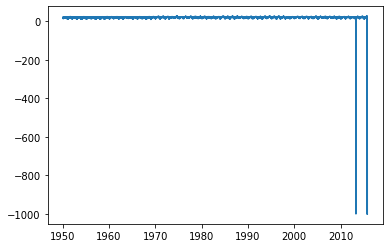

In [36]:
pp.plot(lihue_T_Max['date'],lihue_T_Min['value'])

In [37]:
#all values with -999.9 are used when data is unknown.
#we will change those values to nan first
def gettemp(file,value):
    data = np.concatenate([unroll(row) for row in convert(file) if row[2] == value])
    
    data['value'][data['value'] == -999.9] = np.nan
    
    return data

In [38]:
lihue_T_Max = gettemp('USW00022536.dly','TMAX')
lihue_T_Min = gettemp('USW00022536.dly','TMIN')

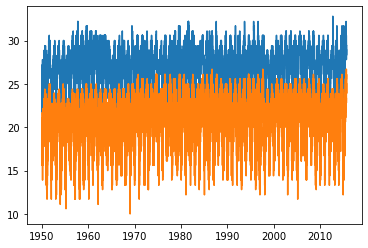

In [39]:
pp.plot(lihue_T_Max['date'],lihue_T_Max['value'])
pp.plot(lihue_T_Min['date'],lihue_T_Min['value'])

In [40]:
#to fill nan values for certain days by using interpolation
def fill_na(data):
    dates_float = data['date'].astype(np.float64)
    
    nan = np.isnan(data['value'])
    
    data['value'][nan] = np.interp(dates_float[nan],dates_float[~nan],data['value'][~nan])

In [41]:
fill_na(lihue_T_Max)
fill_na(lihue_T_Min)

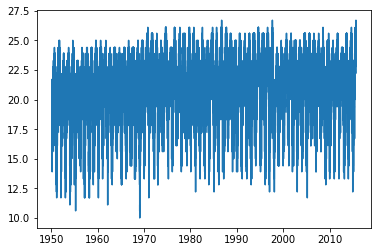

In [42]:
pp.plot(lihue_T_Min['date'],lihue_T_Min['value'])

In [43]:
#to smoothen the values for the plot
def smooth(data,window=10):
    new_val = np.correlate(data['value'],np.ones(window)/window,'same')
    
    pp.plot(data['date'],new_val)

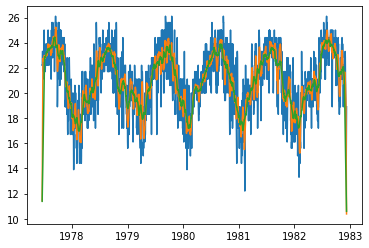

In [44]:
pp.plot(lihue_T_Min[10000:12000]['date'],lihue_T_Min[10000:12000]['value'])

smooth(lihue_T_Min[10000:12000])
smooth(lihue_T_Min[10000:12000],30)

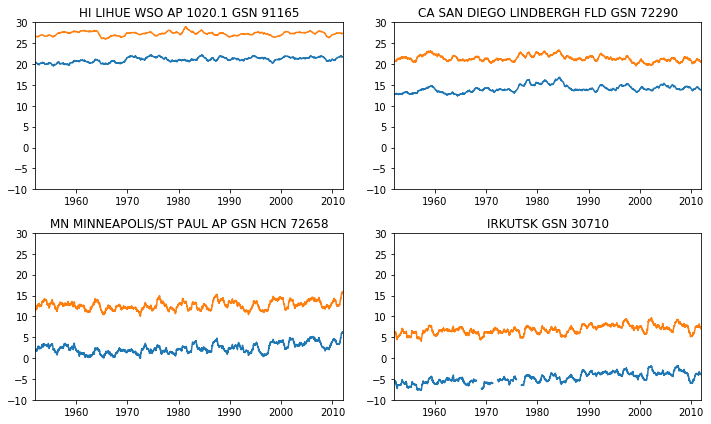

In [45]:
#to get sub_plots of all 4 data stations
pp.figure(figsize=(10,6))

for i,code in enumerate(my_stations):
    pp.subplot(2,2,i+1)
    
    smooth(gettemp('{}.dly'.format(code),'TMIN'),365)
    smooth(gettemp('{}.dly'.format(code),'TMAX'),365)
    
    pp.title(GSN_stations[code])
    pp.axis(xmin=np.datetime64('1952'),xmax=np.datetime64('2012'),ymin=-10,ymax=30)

pp.tight_layout()

In [46]:
#to get data of certain year
def selectyear(data,year):
    start = np.datetime64('{}'.format(year))
    end = start + np.timedelta64(1,'Y')
    
    return data[(data['date'] >= start) & (data['date'] < end)]['value']

In [47]:
selectyear(lihue_T_Min,1951)

array([17.8, 17.8, 17.2, 18.3, 20. , 21.7, 22.2, 21.7, 22.2, 22.2, 21.7,
       21.7, 19.4, 18.9, 18.3, 18.3, 19.4, 20.6, 16.7, 14.4, 14.4, 17.2,
       15. , 12.8, 14.4, 13.3, 15. , 14.4, 17.8, 18.3, 16.7, 16.7, 17.2,
       16.7, 17.8, 14.4, 12.2, 13.3, 13.9, 12.8, 14.4, 14.4, 18.9, 19.4,
       20. , 18.3, 18.3, 18.9, 20. , 18.3, 19.4, 13.3, 11.7, 17.8, 17.2,
       17.8, 21.1, 22.2, 20.6, 22.2, 19.4, 20. , 18.3, 17.8, 17.8, 17.2,
       16.1, 18.9, 18.9, 18.9, 17.8, 16.7, 15.6, 13.3, 13.9, 15.6, 15.6,
       21.7, 20.6, 18.3, 15.6, 14.4, 17.2, 17.8, 18.9, 20. , 18.9, 18.3,
       18.3, 20.6, 20. , 18.9, 18.3, 21.1, 16.7, 21.7, 21.1, 21.7, 17.2,
       16.7, 17.8, 18.3, 16.1, 19.4, 20.6, 18.3, 18.3, 17.2, 18.9, 21.7,
       21.7, 21.7, 21.1, 20.6, 20.6, 20. , 21.7, 20. , 20. , 19.4, 18.3,
       21.7, 22.2, 22.8, 20. , 19.4, 17.2, 22.2, 22.8, 22.8, 22.8, 18.9,
       17.8, 18.3, 19.4, 22.8, 22.2, 22.2, 20.6, 21.1, 21.1, 22.8, 19.4,
       19.4, 20.6, 21.7, 23.3, 23.3, 22.2, 22.2, 23

In [48]:
#to get an array of all minimum tempratures for all years in LIHUE
lihue_all_min = np.vstack([selectyear(lihue_T_Min,year)[:365] for year in range(1951,2014+1)])

#to get an array of all maximum tempratures for all years in LIHUE
lihue_all_max = np.vstack([selectyear(lihue_T_Max,year)[:365] for year in range(1951,2014+1)])

In [51]:
lihue_all_min[:2]

array([[17.8, 17.8, 17.2, 18.3, 20. , 21.7, 22.2, 21.7, 22.2, 22.2, 21.7,
        21.7, 19.4, 18.9, 18.3, 18.3, 19.4, 20.6, 16.7, 14.4, 14.4, 17.2,
        15. , 12.8, 14.4, 13.3, 15. , 14.4, 17.8, 18.3, 16.7, 16.7, 17.2,
        16.7, 17.8, 14.4, 12.2, 13.3, 13.9, 12.8, 14.4, 14.4, 18.9, 19.4,
        20. , 18.3, 18.3, 18.9, 20. , 18.3, 19.4, 13.3, 11.7, 17.8, 17.2,
        17.8, 21.1, 22.2, 20.6, 22.2, 19.4, 20. , 18.3, 17.8, 17.8, 17.2,
        16.1, 18.9, 18.9, 18.9, 17.8, 16.7, 15.6, 13.3, 13.9, 15.6, 15.6,
        21.7, 20.6, 18.3, 15.6, 14.4, 17.2, 17.8, 18.9, 20. , 18.9, 18.3,
        18.3, 20.6, 20. , 18.9, 18.3, 21.1, 16.7, 21.7, 21.1, 21.7, 17.2,
        16.7, 17.8, 18.3, 16.1, 19.4, 20.6, 18.3, 18.3, 17.2, 18.9, 21.7,
        21.7, 21.7, 21.1, 20.6, 20.6, 20. , 21.7, 20. , 20. , 19.4, 18.3,
        21.7, 22.2, 22.8, 20. , 19.4, 17.2, 22.2, 22.8, 22.8, 22.8, 18.9,
        17.8, 18.3, 19.4, 22.8, 22.2, 22.2, 20.6, 21.1, 21.1, 22.8, 19.4,
        19.4, 20.6, 21.7, 23.3, 23.3, 

In [52]:
#to crosscheck if the code worked for 64 years
lihue_all_min.shape

(64, 365)

In [57]:
lihue_tmin_recordmin = np.min(lihue_all_min,axis=0)
lihue_tmin_recordmax = np.max(lihue_all_min,axis=0)

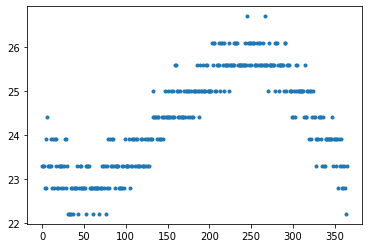

In [59]:
#plotting minimum tempratures for all years in LIHUE with a '.'
pp.plot(lihue_tmin_recordmax,'.')

(-18.25, 365, 8.86, 33.94)

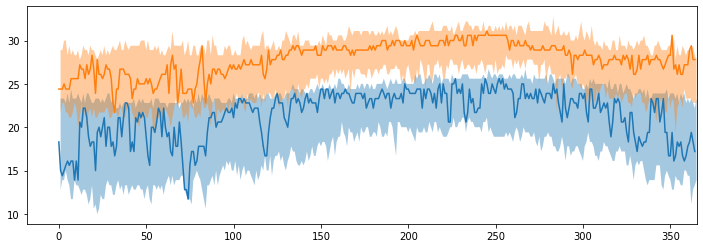

In [61]:
pp.figure(figsize=(12,4))

#for all days in a year
day_range = np.arange(1,365+1)

#filling the tempratures with a gradient of 0.4
pp.fill_between(day_range,np.min(lihue_all_min,axis=0),np.max(lihue_all_min,axis=0),alpha=0.4)
pp.plot(selectyear(lihue_T_Min,2005))

pp.fill_between(day_range,np.min(lihue_all_max,axis=0),np.max(lihue_all_max,axis=0),alpha=0.4)
pp.plot(selectyear(lihue_T_Max,2005))

pp.axis(xmax=365)

In [64]:
#repeating for other places
#getting  data for Minneaplois
minneapolis_T_Max = gettemp('USW00014922.dly','TMAX')
minneapolis_T_Min = gettemp('USW00014922.dly','TMIN')

In [65]:
#repeating for other places
#getting  data for San Diego
sandiego_T_Max = gettemp('USW00023188.dly','TMAX')
sandiego_T_Min = gettemp('USW00023188.dly','TMIN')

In [66]:
#filling null
fill_na(minneapolis_T_Max)
fill_na(minneapolis_T_Min)
fill_na(sandiego_T_Max)
fill_na(sandiego_T_Min)

In [67]:
year_range = np.arange(1940,2014+1)

In [70]:
minneapolis_all_max = np.vstack([selectyear(minneapolis_T_Max,year)[:365] for year in year_range])

In [71]:
minneapolis_mean = np.mean(minneapolis_all_max,axis=1)

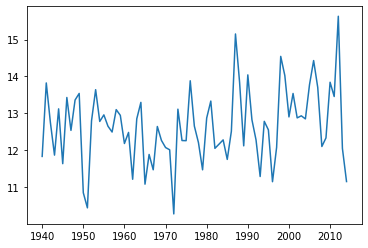

In [72]:
pp.plot(year_range,minneapolis_mean)

In [73]:
#warmest year of Minneapolis
minneapolis_warmest = year_range[np.argmax(minneapolis_mean)]
minneapolis_warmest   

2012

In [74]:
#coldest year of Sann Diego
sandiego_all_min = np.vstack([selectyear(sandiego_T_Min,year)[:365] for year in year_range])
sandiego_mean = np.mean(sandiego_all_min,axis=1)
sandiego_coldest = year_range[np.argmin(sandiego_mean)]
sandiego_coldest

1948

Text(0.5, 1.0, '2012 in Minneapolis vs. 1948 in San Diego')

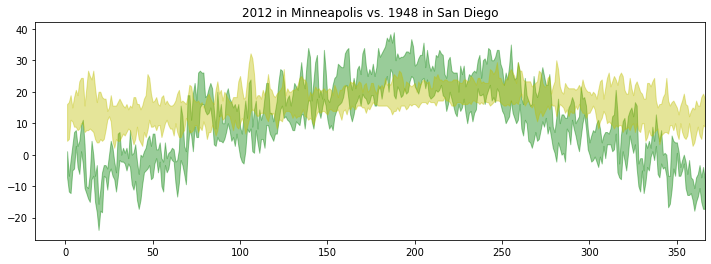

In [76]:
#comparing warmest year in Minneapolis VS coldest year in San Diego
pp.figure(figsize=(12,4))

days = np.arange(1,366+1)

pp.fill_between(days,
                selectyear(minneapolis_T_Min,minneapolis_warmest),
                selectyear(minneapolis_T_Max,minneapolis_warmest),
                color='g',alpha=0.4)

pp.fill_between(days,
                selectyear(sandiego_T_Min,sandiego_coldest),
                selectyear(sandiego_T_Max,sandiego_coldest),
                color='y',alpha=0.4)

pp.axis(xmax=366)

pp.title('{} in Minneapolis vs. {} in San Diego'.format(minneapolis_warmest,sandiego_coldest))